In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [12]:

trades = pd.read_csv('historical_data.csv')
sentiment = pd.read_csv('fear_greed_index.csv')

#Displaying first few rows
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
#Converting Timestamp IST to datetime
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M")

#Extracting date only for joining
trades['Date'] = trades['Timestamp IST'].dt.date

#Converting Closed PnL to numeric
trades['Closed PnL'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')

trades[['Account', 'Execution Price', 'Closed PnL', 'Date']].head()


,Account,Execution Price,Closed PnL,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9769,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9800,0.0,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9855,0.0,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9874,0.0,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9894,0.0,2024-12-02


In [14]:
#Converting 'date' to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])

sentiment['Date'] = sentiment['date'].dt.date

sentiment[['Date', 'classification', 'value']].head()


,Date,classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


In [15]:
# Merging on 'Date'
df = pd.merge(trades, sentiment, on='Date', how='inner')

#Dropping irrelevant columns
df = df[['Account', 'Execution Price', 'Closed PnL', 'Side', 'Date', 'classification', 'value']]

df.head()


,Account,Execution Price,Closed PnL,Side,Date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9769,0.0,BUY,2024-12-02,Extreme Greed,80
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9800,0.0,BUY,2024-12-02,Extreme Greed,80
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9855,0.0,BUY,2024-12-02,Extreme Greed,80
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9874,0.0,BUY,2024-12-02,Extreme Greed,80
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,7.9894,0.0,BUY,2024-12-02,Extreme Greed,80


/tmp/ipython-input-16-1417034243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis')


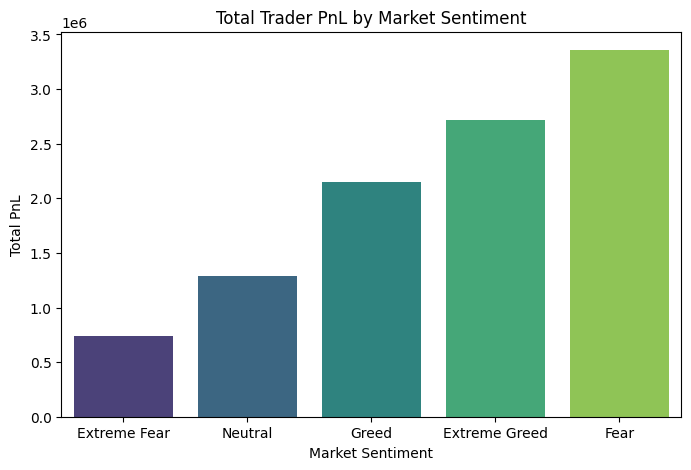

In [16]:
#Total PnL per sentiment class
pnl_by_sentiment = df.groupby('classification')['Closed PnL'].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis')
plt.title('Total Trader PnL by Market Sentiment')
plt.ylabel('Total PnL')
plt.xlabel('Market Sentiment')
plt.show()


/tmp/ipython-input-17-3336906910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='coolwarm')


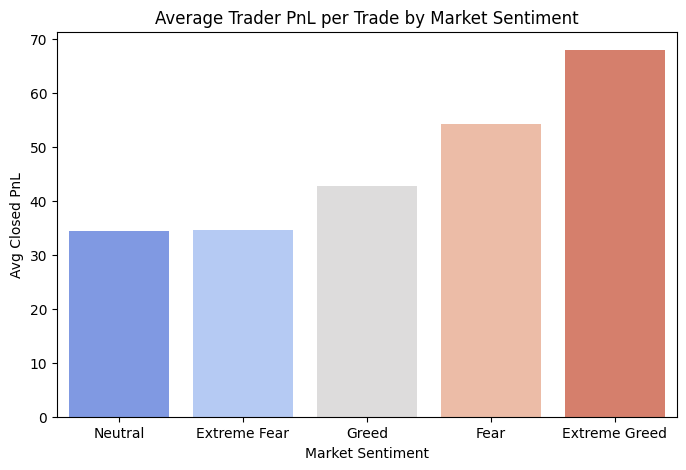

In [17]:
#Average PnL per Trade by Sentiment
avg_pnl = df.groupby('classification')['Closed PnL'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='coolwarm')
plt.title('Average Trader PnL per Trade by Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()


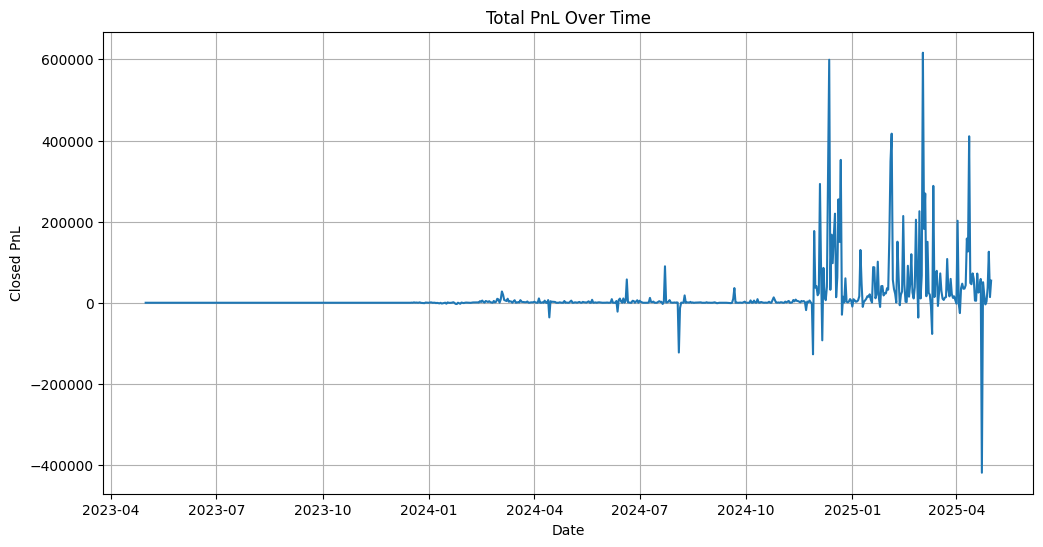

In [18]:
#Trader PnL Over Time (Time Series)
df_grouped = df.groupby('Date')['Closed PnL'].sum()

plt.figure(figsize=(12,6))
df_grouped.plot()
plt.title("Total PnL Over Time")
plt.ylabel("Closed PnL")
plt.xlabel("Date")
plt.grid(True)
plt.show()


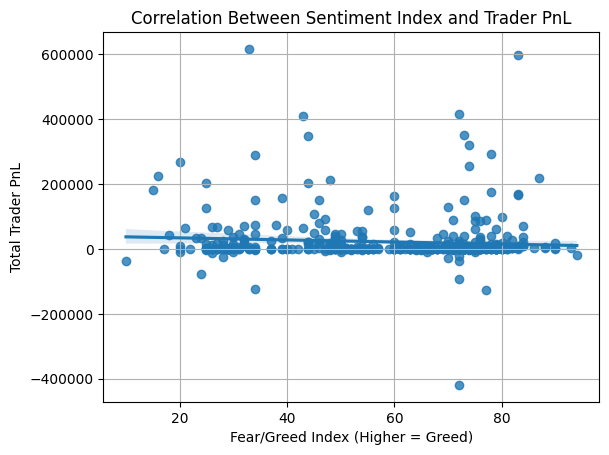

In [19]:
#Group by date and aggregate
daily_stats = df.groupby('Date').agg({
    'Closed PnL': 'sum',
    'value': 'mean'
}).reset_index()

sns.regplot(x='value', y='Closed PnL', data=daily_stats)
plt.title("Correlation Between Sentiment Index and Trader PnL")
plt.xlabel("Fear/Greed Index (Higher = Greed)")
plt.ylabel("Total Trader PnL")
plt.grid(True)
plt.show()
